<h1> A </he>

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [88]:
red = pd.read_csv('./winequality-red.csv', sep=';')

In [89]:
red.head()
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = red['quality'].copy()
X = red.drop('quality', axis=1).copy()
columns = X.columns
X = scaler.fit_transform(X.to_numpy())
X = pd.DataFrame(X, columns=columns)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
predicted = model.predict(X_test)
predicted.shape

(480,)

In [94]:
from sklearn.metrics import mean_squared_error
mse_all = mean_squared_error(y_test, predicted)
print(mse_all)


0.40078036637500486


In [95]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [96]:
features = X.columns
mse_featurewise = {}

for feature in features :
    x = X[feature].copy().to_frame()
    y = Y.copy()
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    mse = mean_squared_error(y_test, predicted)
    mse_featurewise[feature] = mse

print(mse_featurewise)


{'fixed acidity': 0.5931849306434421, 'volatile acidity': 0.5483116505063507, 'citric acid': 0.5876473149172435, 'residual sugar': 0.5924130330685382, 'chlorides': 0.5815596304323115, 'free sulfur dioxide': 0.6056395761949708, 'total sulfur dioxide': 0.5812709946962418, 'density': 0.5668221812286502, 'pH': 0.5965478383865231, 'sulphates': 0.5512069453607954, 'alcohol': 0.4386573651787201}


Text(0, 0.5, 'MSE')

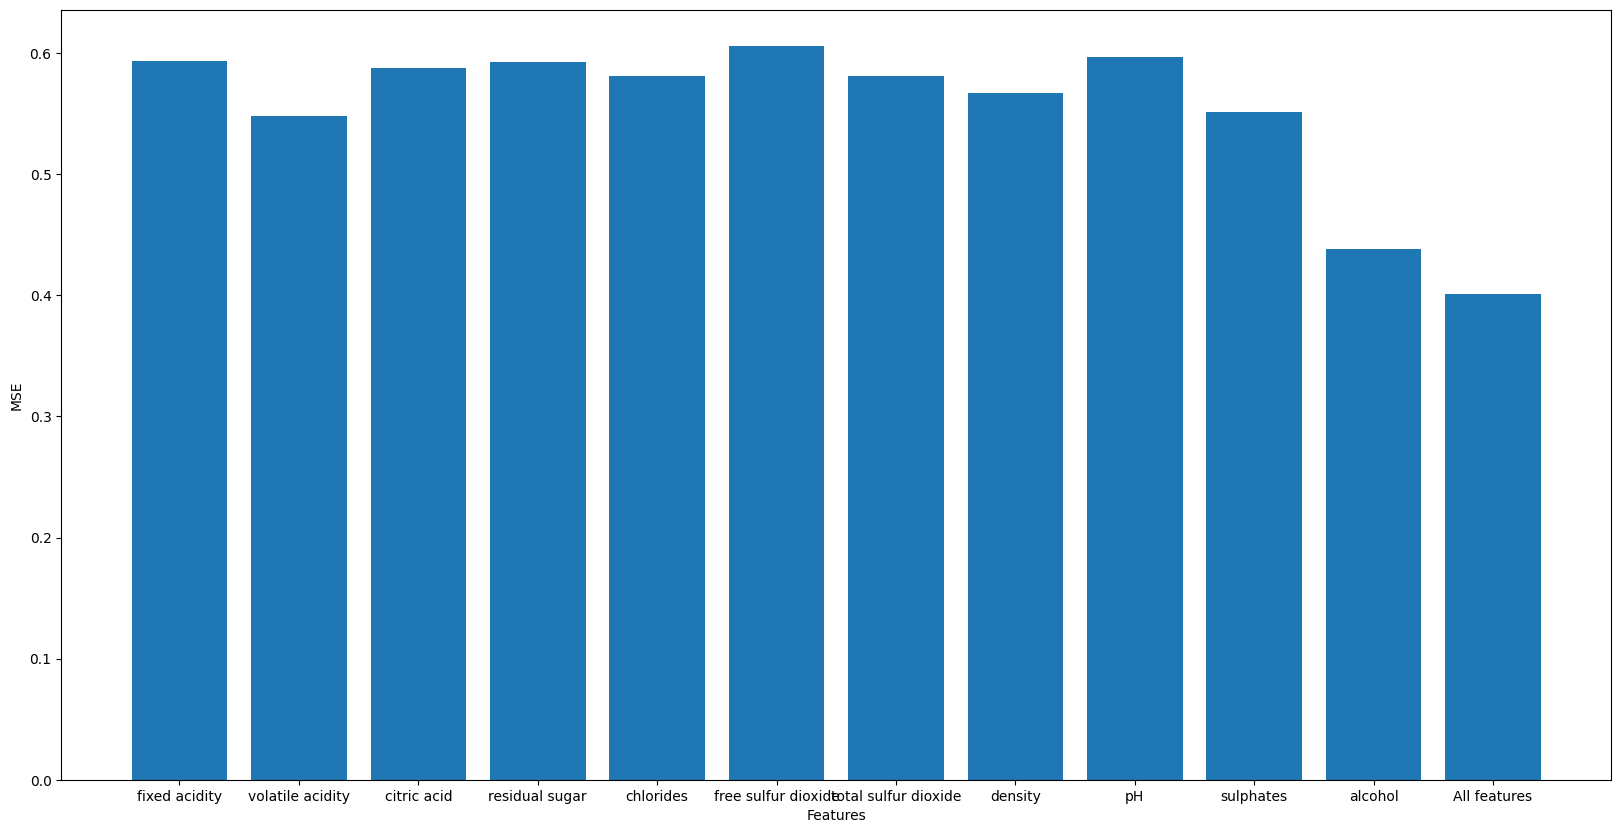

In [97]:
mse_featurewise['All features'] = mse_all
keys = mse_featurewise.keys()
values = mse_featurewise.values()
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.bar(keys, values)
plt.xlabel('Features')
plt.ylabel('MSE')

<h1> B </h1>

# General Multiple Linear Regression Equation

The general multiple linear regression equation is represented as:

\[ Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε \]

Where:
- \( Y \) is the dependent variable (the variable we are trying to predict).
- \( X₁, X₂, ..., Xₙ \) are the independent variables (also known as predictors or features).
- \( β₀ \) is the intercept term, representing the value of \( Y \) when all independent variables are zero. It is the value of \( Y \) when no predictors are influencing it.
- \( β₁, β₂, ..., βₙ \) are the coefficients, representing the change in \( Y \) for a one-unit change in each respective independent variable, holding all other variables constant. These are the parameters estimated by the regression model.
- \( ε \) represents the error term, which captures the difference between the observed values of the dependent variable and the values predicted by the model. It includes all other factors that influence the dependent variable but are not included in the model.

The goal of multiple linear regression is to estimate the coefficients \( β₀, β₁, ..., βₙ \) that best fit the observed data, minimizing the error term \( ε \). This is typically done using methods like ordinary least squares (OLS) regression, which finds the coefficients that minimize the sum of the squared differences between the observed and predicted values of the dependent variable.


# Dummy Variables in Linear Regression

Dummy variables are binary variables used to represent categorical data in regression analysis. They are essential when dealing with nominal variables in linear regression.

### Concept of Dummy Variable:
A dummy variable, also known as an indicator variable, is a binary variable used to represent categorical data in regression analysis. It is used when a categorical variable has more than two categories.

### How Dummy Variables are Calculated:
1. **Identify Categories**: Identify the categories within the nominal variable.
2. **Create Dummy Variables**: Create \( n - 1 \) dummy variables, where \( n \) is the number of categories. Each category is represented by a separate dummy variable.
3. **Assign Values**: Assign a value of 1 to the dummy variable corresponding to the presence of a particular category, and assign a value of 0 to all other dummy variables.

### Why Convert Nominal Variables to Dummy Variables:
- **Linearity Assumption**: Linear regression assumes that the relationship between the independent variables and the dependent variable is linear. Including nominal variables directly in the model violates this assumption.
- **Interpretability**: Dummy variables allow for the inclusion of categorical variables in regression models while maintaining interpretability.
- **Statistical Analysis**: Dummy variables enable statistical software to handle categorical data appropriately and perform regression analysis effectively.

### Example:
Suppose we have a nominal variable "Color" with three categories: Red, Green, and Blue. We create two dummy variables: "Green" and "Blue." If an observation is Green, the "Green" dummy variable will be 1 and the "Blue" dummy variable will be 0. If an observation is Blue, the "Green" dummy variable will be 0 and the "Blue" dummy variable will be 1. If an observation is Red, both dummy variables will be 0 (implicitly representing Red).


# Assumptions in Linear Regression

Linear regression relies on several assumptions to provide reliable and accurate results. Violations of these assumptions can lead to biased estimates and unreliable predictions. Here are the key assumptions in linear regression along with suitable explanations:

### 1. Linearity:
**Assumption**: The relationship between the independent variables and the dependent variable is linear.
**Explanation**: Linear regression assumes that the relationship between the independent variables and the dependent variable is linear. If the relationship is non-linear, the model may not accurately capture the underlying patterns in the data, leading to biased estimates and predictions.

### 2. Independence of Errors:
**Assumption**: The errors (residuals) are independent of each other.
**Explanation**: Linear regression assumes that the errors (residuals) are independent of each other. In other words, the error of one observation should not be correlated with the error of another observation. Violations of this assumption can lead to biased estimates and incorrect standard errors, affecting the validity of statistical inference.


### 3. Normality of Errors:
**Assumption**: The errors (residuals) are normally distributed.
**Explanation**: Linear regression assumes that the errors (residuals) are normally distributed with a mean of zero. Deviations from normality can affect the accuracy of statistical tests and confidence intervals. However, linear regression is relatively robust to moderate departures from normality, especially with large sample sizes.

### 4. No Perfect Multicollinearity:
**Assumption**: There is no perfect multicollinearity among the independent variables.
**Explanation**: Multicollinearity occurs when two or more independent variables are highly correlated with each other. Perfect multicollinearity, where one independent variable can be exactly predicted from another, can lead to unstable estimates and inflated standard errors.

### 5. No Endogeneity:
**Assumption**: The independent variables are not correlated with the errors (residuals).
**Explanation**: Endogeneity occurs when one or more independent variables are correlated with the errors. This violates the assumption of exogeneity, where the independent variables are assumed to be determined independently of the errors.

### Conclusion:
Understanding and validating these assumptions are crucial when applying linear regression models. Violations of these assumptions can lead to biased estimates, incorrect inferences, and unreliable predictions. It's important to assess these assumptions and, if necessary, use appropriate techniques to address any violations.
